<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/hf_scf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hartree-Fock Self-Consistent Field (HF-SCF)**

**Water molecule (H₂O)**

converged SCF energy = -76.0228690551882


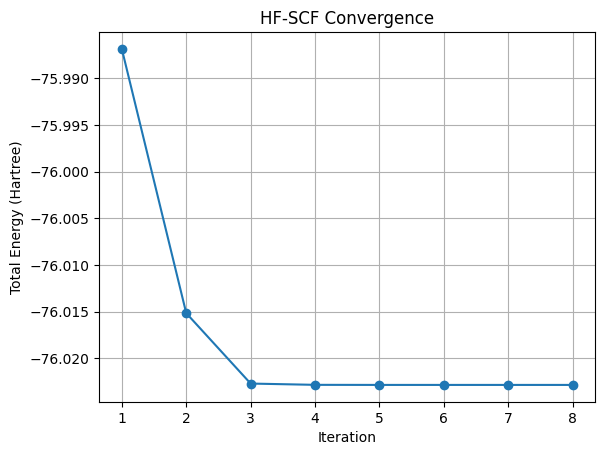

HF-SCF energy for H2O: -76.02286905518817 Hartree


In [2]:
# First, ensure you have the PySCF package installed
!pip install pyscf -q

from pyscf import gto, scf
import matplotlib.pyplot as plt

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
        O  0.0000000   0.0000000   0.0000000
        H  0.7586022   0.0000000   0.5042847
        H -0.7586022   0.0000000   0.5042847
    ''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")
